# Explore here

In [1]:
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1. descargar data

url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
respuesta = requests.get(url)
nombre_archivo = "medical_insurance_cost.csv"
with open(nombre_archivo, 'wb') as archivo:
    archivo.write(respuesta.content)


# 2. convertir csv en dataframe

total_data = pd.read_csv("../data/raw/medical_insurance_cost.csv")
total_data.shape
total_data.info()
total_data.head()

# buscar duplicados

total_data_sin = total_data.drop_duplicates()
total_data_sin.shape
# print(total_data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(1337, 7)

Limpieza de datos
- No hay duplicados ni valores nulos
- Ninguna variables es objetivamente eliminable de entrada
- 4 variables numericas y 3 categoricas
- 

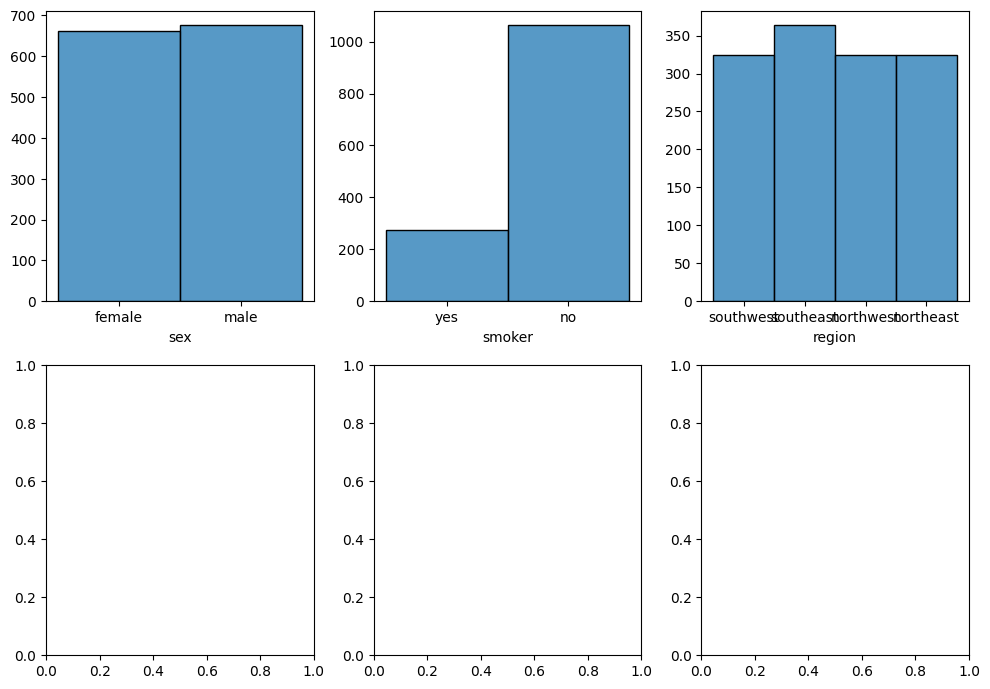

In [2]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = total_data, x = "sex").set(ylabel = None)
sns.histplot(ax = axis[0, 1], data = total_data, x = "smoker").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = total_data, x = "region").set(ylabel = None)

plt.tight_layout()
plt.show()

Analisis univariable categorico

- numero de hombres y mujeres es muy similar 
- 3/4 partes son no fumadores
- la distribucion regional es muy similar, con una ligera mayoria de usuarios del South East  

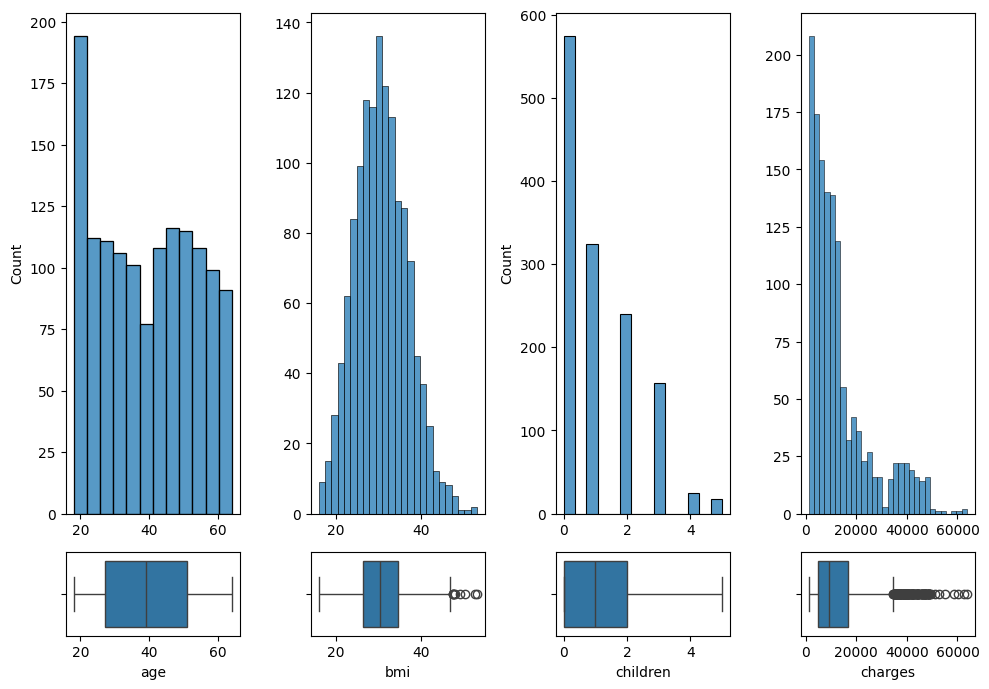

In [3]:
fig, axis = plt.subplots(2, 4, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")
sns.histplot(ax = axis[0, 1], data = total_data, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "bmi")
sns.histplot(ax = axis[0, 2], data = total_data, x = "children").set(xlabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "children")
sns.histplot(ax = axis[0, 3], data = total_data, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = total_data, x = "charges")
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Analisis univariable numerica



De esta visualizacion podemos ver que:

- age tiene una distribucion simetrica practicamente perfecta
- bmi tiene un ligero sesgo hacia los valores mas bajos y algunos valores atipicos en los maximos
- children : asimetrica negativa. valores menores estan muy concentrados
- charges : asimetrica negativa. valores menores muy concentrados. Importante numero de valores atipicos.   



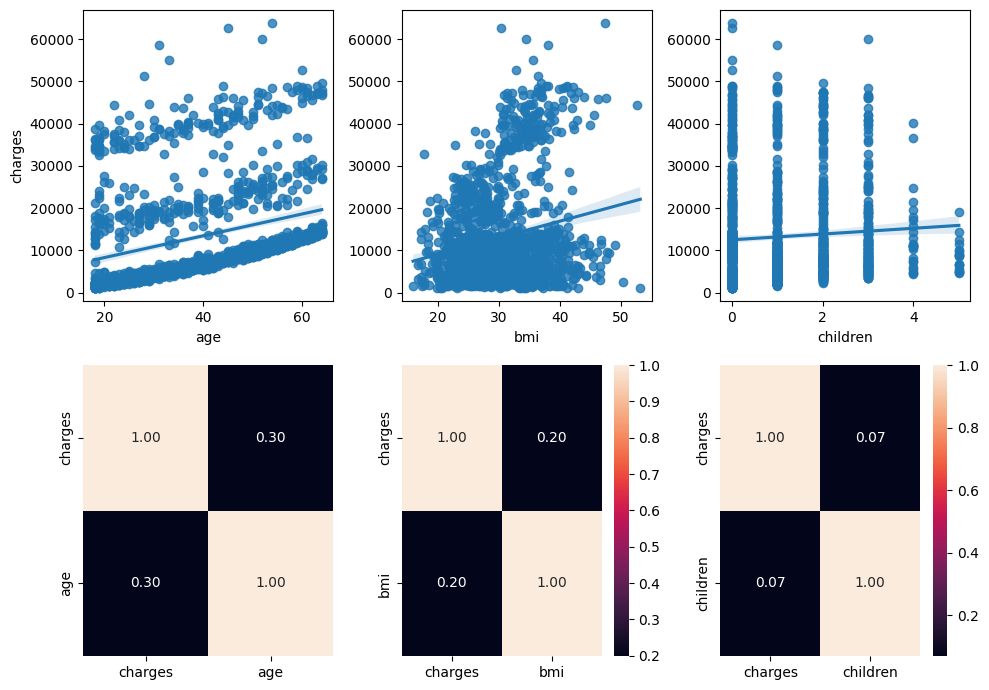

In [4]:
# analis multivariable numerico entre predictoras y target (1)

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = total_data, x = "children", y = "charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Analisis multivariable numerico-numerico (1)

- correlacion directa debil fuerte entre age y target 
- correlacion directa mas debil entre bmi y el target
- correlacion muy debil entre numero de hijos y target


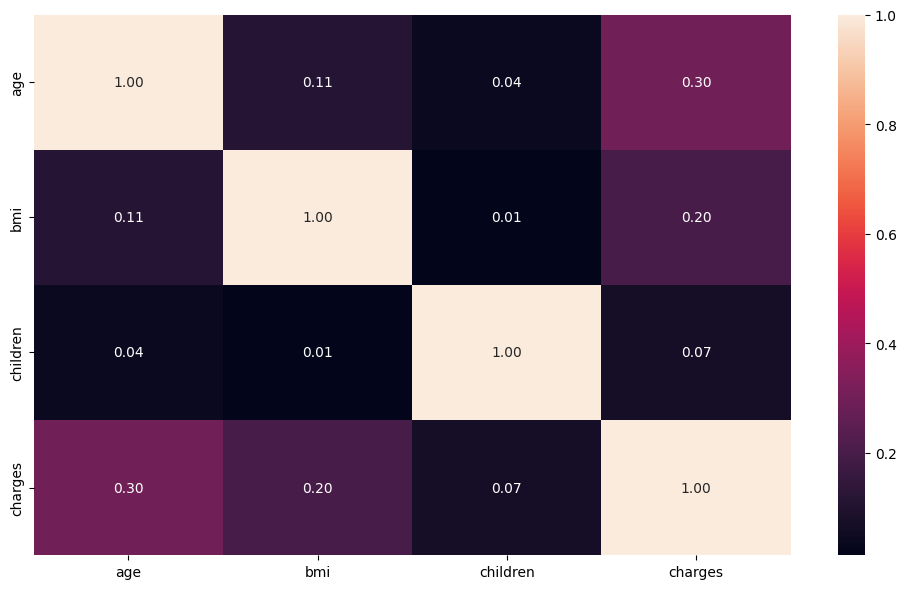

In [5]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[['age', 'bmi', 'children', 'charges']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

- las variables bmi y age son las que tienen una correlacion directa mas alta con el objetivo.
Las demas tienen una correlacion muy debil con el target e incluso entre ellas. La unica reseñable sería bmi con age


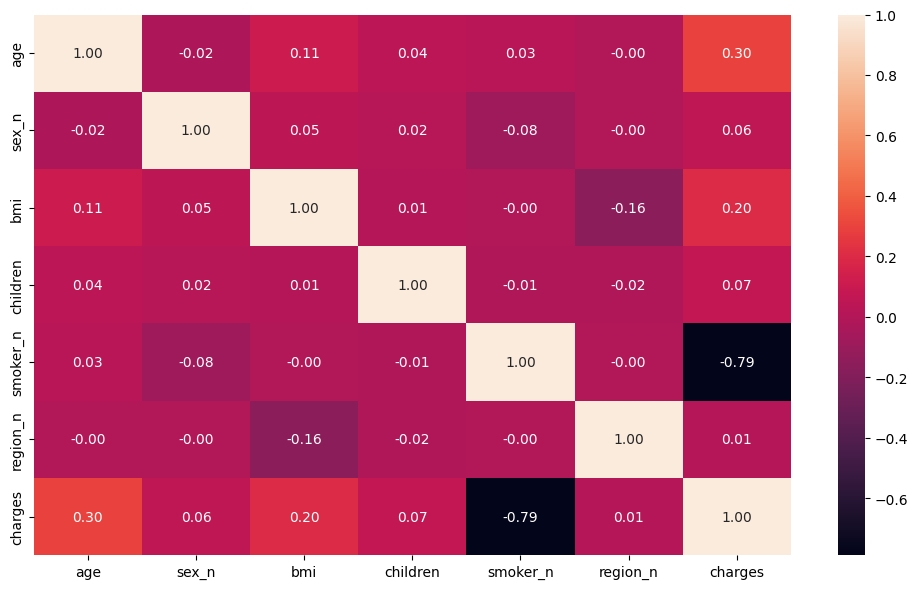

In [6]:
# print(total_data.columns) ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[['age', 'sex_n', 'bmi', 'children', 'smoker_n', 'region_n', 'charges']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

Análisis numérico-categórico (completo) 

- no revela ninguna otra correlacion directa reseñable que las ya conocidas. 
- sorprende la fuerte correlacion negativa de smoker con el objetivo. 

In [7]:
# analisis de outliers

total_data.describe()


,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217,1.484305
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


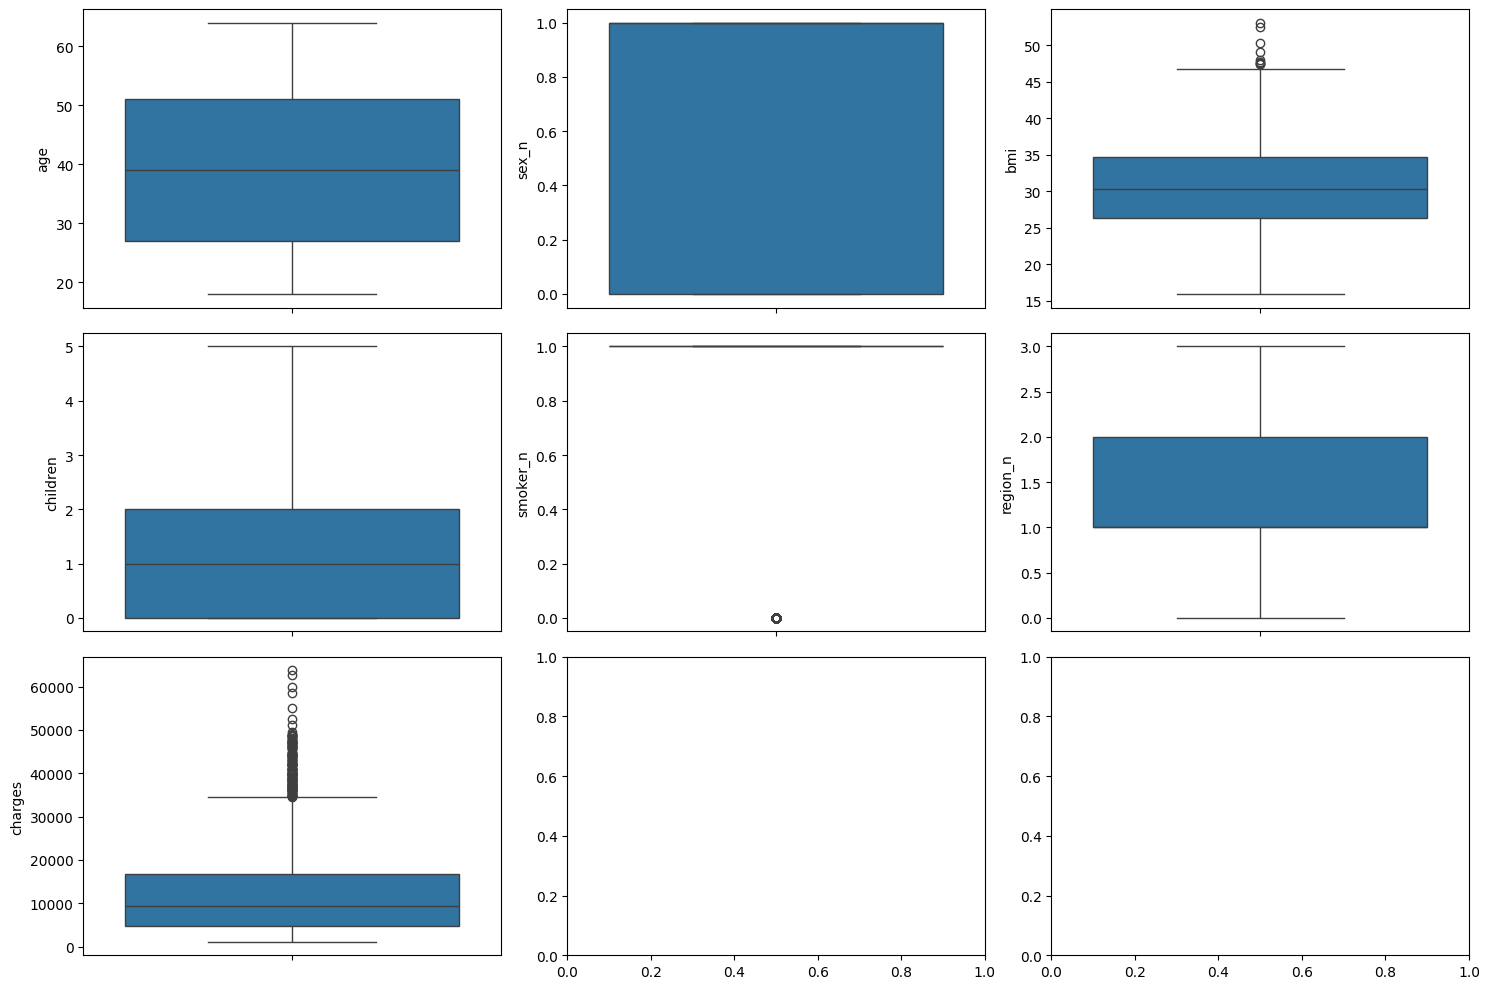

In [8]:
# analisis  de outliers 'age', 'sex_n', 'bmi', 'children', 'smoker_n', 'region_n', 'charges'

fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "sex_n")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "bmi")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "children")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "smoker_n")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "region_n")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "charges")

plt.tight_layout()

plt.show()

la variable charges (objetivo) es la que mas outliers tiene. 
Mientras que el 75% de los valores se acercan a la media (13270), el maximo llega a los 63770. 
Reemplazamos valores usando upper y lower limit. 

In [9]:
charges_stats = total_data["charges"].describe()
charges_stats

bmi_stats = total_data["bmi"].describe()
bmi_stats

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [10]:
charges_iqr = charges_stats["75%"] - charges_stats["25%"]
upper_limit = charges_stats["75%"] + 1.5 * charges_iqr
lower_limit = charges_stats["25%"] - 1.5 * charges_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers en la variable CHARGES son {round(upper_limit, 2)} y {round(lower_limit, 2)}")

total_data[total_data["charges"] > 35000]

# filtramos los valores superiores al upper limit

total_data_fil = total_data[total_data["charges"] <= 35000]


# eliminar outliers para bmi

bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
upper_limit = bmi_stats["75%"] + 1.5 * bmi_iqr
lower_limit = bmi_stats["25%"] - 1.5 * bmi_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers en la variable BMI son {round(upper_limit, 2)} y {round(lower_limit, 2)}")

# pero segun la World Health Organization (WHO)  UN bmi ≥ 40 EQUIVALE A Morbid Obesity/Class III 
# print(total_data_fil.columns) 

# filtramos los valores de bmi superiores a 40 

total_data_fil2 = total_data_fil[total_data_fil["bmi"] < 40]

total_data_fil2 = total_data_fil.drop(columns=['smoker', 'region', 'sex', 'region_n', 'sex_n'])
total_data_fil2.shape


Los límites superior e inferior para la búsqueda de outliers en la variable CHARGES son 34489.35 y -13109.15
Los límites superior e inferior para la búsqueda de outliers en la variable BMI son 47.29 y 13.7


(1205, 5)

In [11]:
from sklearn.model_selection import train_test_split

# Dividimos el conjunto de datos en muestras de train y test
X = total_data_fil2.drop("charges", axis = 1)
y = total_data_fil2["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,bmi,children,smoker_n
335,64,34.5,0,1
973,19,40.5,0,1
430,19,33.1,0,1
705,33,32.9,2,1
1003,48,29.6,0,1


In [12]:
# escalamiento min-max
 
from sklearn.preprocessing import MinMaxScaler

col_names = ['age', 'bmi', 'children', 'smoker_n']
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns=col_names)
X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns=col_names)

X_train_scal.head()

,age,bmi,children,smoker_n
335,1.000000,0.498789,0.0,1.0
973,0.021739,0.660210,0.0,1.0
430,0.021739,0.461125,0.0,1.0
705,0.326087,0.455744,0.4,1.0
1003,0.652174,0.366963,0.0,1.0


In [13]:
X_train_scal.to_csv("../data/interim/medical_insu_train.csv", index=False)
X_test_scal.to_csv("../data/interim/medical_insu_test.csv", index=False)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scal, y_train)

print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 16902.798511090397
Coeficientes (b1, b2): [ 10853.87107645   3094.01812462   2113.8088042  -15345.37263358]


In [15]:
y_pred = model.predict(X_test_scal)
y_pred

array([20918.2622962 , 13281.15139039,  7389.38022079, 18165.92962207,
       21123.06613578, 22909.3918745 , 11503.9984712 ,  9673.48624883,
        7724.48484086, 11266.7618788 ,  9435.09676837, 10807.50731011,
        8110.49473074, 28666.06286199,  9561.88367742, 28999.72034497,
        8584.4146034 , 12275.66348103, 13934.64414181, 20311.60231736,
        7324.89307069, 10649.60480004,  5640.66499205,  8890.16412246,
       14577.41766549,  2838.48422935,  7914.209835  , 12544.60326506,
       11137.93447784,  4118.97281199,  2275.7534204 , 10737.0362487 ,
       23987.19901607, 18328.2469571 ,  9589.57132844, 12309.9217265 ,
        2735.6832505 ,  9076.33383813,  3661.12397337, 12786.38019596,
       28405.93892765, 10007.73132242, 11762.62809722,  9683.95263457,
        4751.11659365,  4223.91621068,  6899.09506506,  9786.50167887,
        3357.83827308, 12596.17401088, 13002.80687361,  2935.74820936,
        4896.68672577,  5321.56732083, 13364.06699362,  3942.05782246,
      

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 27487029.043902114
Coeficiente de determinación: 0.5741497153372841


In [17]:
# # optimizacion con lasso 

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso_model = Lasso(alpha=0.2)  # alpha es el parámetro de regularización

# Entrenar el modelo
lasso_model.fit(X_train_scal, y_train)

# Hacer predicciones
y_pred = lasso_model.predict(X_test_scal)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuasdratico medio (Lasso):", mse)
print("Coeficientes (Lasso):", lasso_model.coef_)
print("Intercepto (Lasso):", lasso_model.intercept_)

# optimizacion con ridge 

from sklearn.linear_model import Ridge

# Entrenar el modelo de regresión Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scal, y_train)
y_pred = ridge_model.predict(X_test_scal)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


Error cuasdratico medio (Lasso): 27485478.06094573
Coeficientes (Lasso): [ 10852.12821784   3085.24032631   2110.19655586 -15342.07360822]
Intercepto (Lasso): 16904.773461936704
R2 score: 0.5742456667615655
